# 3 Начало работы с нейронными сетями

## 3.4 Классификация отзывов к фильмам (пример бинарной классификации)

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[42]])

In [4]:
decoded_review

"? warning this review contains spoilers do not read if you don't want some points revealed to you before you watch the film br br with a cast like this you wonder whether or not the actors and actresses knew exactly what they were getting into did they see the script and say hey close encounters of the third kind was such a hit that this one can't fail ' unfortunately it does did they even think to check on the director's ? i mean would you do a movie with the director of a movie called ? ? ' ? clark who would later go on to direct the infamous final justice ' made this it makes you wonder how the people of mystery science theater 3000 could hammer final ? and completely miss out on the return ' br br the film is set in a small town in new mexico a little boy and girl are in the street ? one night when a powerful ? ? er a spaceship appears and ? over them in probably the worst special effect sequence of the film the ship ? some kind of red ? on them it looked like clark had held a ? o

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [134]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [135]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [136]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [137]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.5251 - accuracy: 0.7736 - val_loss: 0.3933 - val_accuracy: 0.8612
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3076 - accuracy: 0.9067 - val_loss: 0.3117 - val_accuracy: 0.8832
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2221 - accuracy: 0.9281 - val_loss: 0.2794 - val_accuracy: 0.8913
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1745 - accuracy: 0.9439 - val_loss: 0.3056 - val_accuracy: 0.8770
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1432 - accuracy: 0.9541 - val_loss: 0.2866 - val_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1135 - accuracy: 0.9668 - val_loss: 0.3482 - val_accuracy: 0.8684
Epoch 7/20
15000/15000 [==============================] - 1s 89us/s

In [138]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

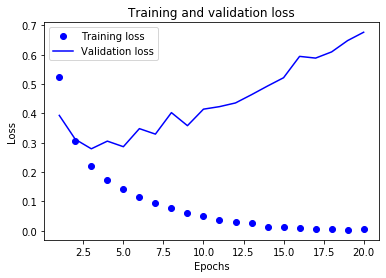

In [139]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

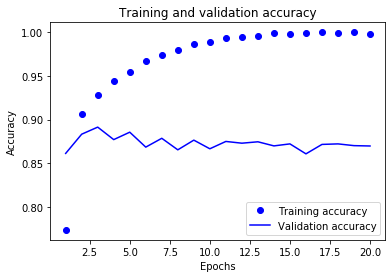

In [140]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Результат - оптимальное количество эпох = 3-4

In [145]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.0294 - accuracy: 0.9926
Epoch 2/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.0209 - accuracy: 0.9954
Epoch 3/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.0148 - accuracy: 0.9966
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


In [146]:
results

[0.8045659324216843, 0.8557199835777283]

### Пример предсказаний на обученной NN

In [32]:
first_42 = model.predict(x_train[1:43])
print(*('good' if i > 0.5 else 'bad' for i in first_42), sep='\n')

bad
bad
good
bad
bad
good
bad
good
bad
good
bad
bad
bad
bad
bad
good
good
bad
good
bad
bad
bad
bad
good
good
good
bad
good
bad
bad
good
good
good
bad
bad
bad
good
bad
bad
good
bad
bad


## 3.5 Классификация новостных лент: пример классификации в несколько классов

In [2]:

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[412]])
print(decoded_newswire)

? dart group corp said it offered to buy supermarkets general corp for 41 75 dlrs per share in cash earlier supermarkets general said an unsolicited third party had made the offer analysts estimated the value at about 1 6 billion dlrs based on 38 5 mln shares outstanding kidder peabody and co inc told dart that ? affiliate will be prepared to advance up to 750 mln dlrs on a subordinated basis 3


In [9]:
train_labels[10]

3

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 319us/step - loss: 2.6406 - accuracy: 0.5096 - val_loss: 1.7771 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.4268 - accuracy: 0.7023 - val_loss: 1.3014 - val_accuracy: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.0418 - accuracy: 0.7786 - val_loss: 1.1258 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.8244 - accuracy: 0.8254 - val_loss: 1.0293 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.6562 - accuracy: 0.8629 - val_loss: 0.9650 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.5276 - accuracy: 0.8934 - val_loss: 0.9291 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.

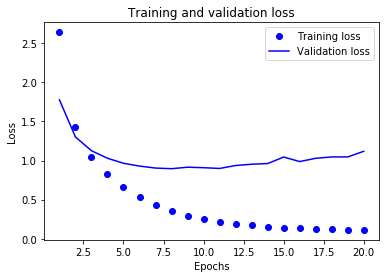

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

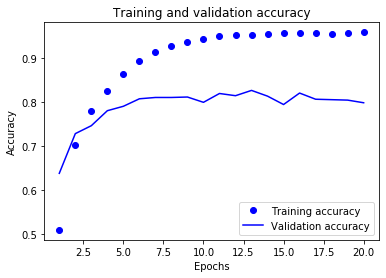

In [19]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model.fit(model.fit(x_train, one_hot_train_labels, epochs=4, batch_size=512)
results = model.evaluate(x_test, ))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.1016 - accuracy: 0.9560 - val_loss: 0.1667 - val_accuracy: 0.9440
Epoch 2/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.0971 - accuracy: 0.9569 - val_loss: 0.1952 - val_accuracy: 0.9460
Epoch 3/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.0956 - accuracy: 0.9594 - val_loss: 0.2136 - val_accuracy: 0.9420
Epoch 4/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.0964 - accuracy: 0.9572 - val_loss: 0.2211 - val_accuracy: 0.9430
Epoch 5/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.0968 - accuracy: 0.9590 - val_loss: 0.2505 - val_accuracy: 0.9400
Epoch 6/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.0934 - accuracy: 0.9578 - val_loss: 0.2717 - val_accuracy: 0.9390
Epoch 7/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.0928 - acc

In [23]:
results

[1.266463365495364, 0.7880676984786987]

In [25]:
results

[1.3981258540098305, 0.7836152911186218]